In [5]:
import numpy as np
import matplotlib.pyplot as plt

class Actions:
    def __init__(self, true_mean):
        self.true_mean = true_mean
        self.mean = 0
        self.N = 0
        
    def choose(self):
        return np.random.randn() + self.true_mean
    
    def update(self, x):
        self.N += 1
        self.mean = (1 - 1.0/self.N)*self.mean + 1.0/self.N*x

def run_experiment(m1, m2, m3, eps, N):
    actions = [Actions(m1), Actions(m2), Actions(m3)]
    
    data = np.empty(N)
    
    for i in range(N):
        p = np.random.random()
        if p < eps:
            j = np.random.choice(3)
        else:
            j = np.argmax([a.mean for a in actions])
        x = actions[j].choose()
        actions[j].update(x)

        data[i] = x
    cumulative_average = np.cumsum(data) / (np.arange(N) +1)
    
    plt.plot(cumulative_average)
    plt.plot(np.ones(int(N*m1)))
    plt.plot(np.ones(int(N*m2)))
    plt.plot(np.ones(int(N*m3)))
    plt.xscale('log')
    plt.show()
    
    for a in actions:
        print(a.mean)
        
    return cumulative_average


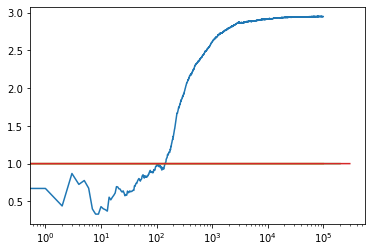

1.0148357511391708
1.9976706122334065
3.000472978180936


In [6]:
c_1 = run_experiment(1.0,2.0,3.0,0.05,100000)